<a href="https://colab.research.google.com/github/skymined/study_data_analytics/blob/main/docs/pandas/09_pandas_useful.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 연속형을 범주형으로 전환

In [ ]:
import pandas as pd
import numpy as np
# 샘플 데이터 생성 (이상치 포함)
df_data = pd.DataFrame({
    'Age_20_50': np.random.randint(20, 50, size=100).tolist() # row를 맞춰야 해서 size = 100으로 바꿈
    , 'Age_outlier': np.random.randint(20, 50, size=95).tolist() + [9, 75, 80, 85, 90]
    # 대부분 20세에서 70세 사이이나, 몇몇 이상치 포함
})
df_data[:2]

,Age_20_50,Age_outlier
0,26,35
1,45,46


In [ ]:
df_data.shape

(100, 2)

### without outlier

<Axes: xlabel='Age_20_50', ylabel='count'>

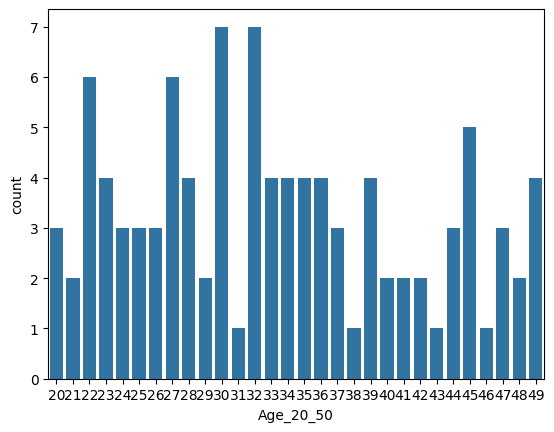

In [ ]:
import seaborn as sns
sns.countplot(data=df_data, x='Age_20_50')

In [ ]:
bins = [19, 29, 39, 49]
labels = ['20-29', '30-39', '40-49'] # 해당 개수만큼 넣어줌
df_data['Age_20_50_category'] = pd.cut(x=df_data['Age_20_50'], bins=bins, labels=labels)
df_data[:10]
df_data['Age_20_50_category'].value_counts()

30-39    39
20-29    36
40-49    25
Name: Age_20_50_category, dtype: int64

In [ ]:
df_data['Age_20_50_category'].value_counts().sort_index()

20-29    36
30-39    39
40-49    25
Name: Age_20_50_category, dtype: int64

### with outlier

In [ ]:
bins = [0,19, 29, 39, 49, 100] # 최상과 최하값을 입력
labels = ['< 20', '20-29', '30-39', '40-49', '50+'] # 해당 개수만큼 넣어줌
df_data['Age_outlier_100'] = pd.cut(x=df_data['Age_outlier'], bins=bins, labels=labels)
df_data['Age_outlier_100'].value_counts()

30-39    36
20-29    35
40-49    24
50+       4
< 20      1
Name: Age_outlier_100, dtype: int64

In [ ]:
9999-12-31